In [32]:
import pandas as pd
import numpy as np
import seaborn as sns


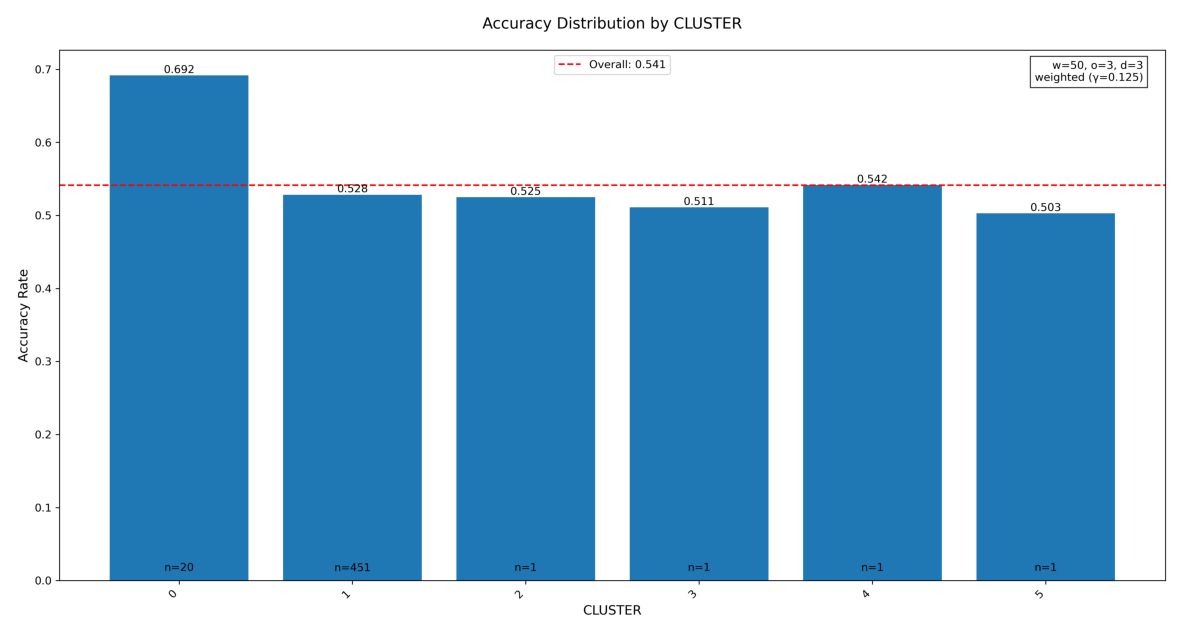

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# read PNG file
img = mpimg.imread('datasets/cluster_accuracy_distribution_w50_o3_d3_weighted_gamma0.125_cluster.png')

# set image size
plt.figure(figsize=(15, 8))

# show image
plt.imshow(img)
plt.axis('off')  # not show axis
plt.show()

In [4]:
df_experiement_best = pd.read_parquet("datasets/sig_data_SP500_w50_o3_d3_weighted_gamma0.125_clusters.parquet")
df_experiement_best

,symbol,date,Sector,Industry,SIG_0,SIG_1,SIG_2,SIG_3,SIG_4,SIG_5,...,SIG_33,SIG_34,SIG_35,SIG_36,SIG_37,SIG_38,SIG_39,RET,CLUSTER,adaptive_weight
0,A,2020-05-28,Healthcare,Diagnostics & Research,1.0,71.0,-0.093269,-0.004995,2520.5,-0.305379,...,-0.000177,-0.008737,1.977320e-06,1.541674e-06,0.000696,-9.651211e-07,-2.077573e-08,0.005918,0,0.0
1,A,2020-05-29,Healthcare,Diagnostics & Research,1.0,71.0,0.028441,-0.007770,2520.5,0.104758,...,0.000134,-0.002537,-4.423645e-07,1.415613e-06,0.001660,-1.223520e-06,-7.817757e-08,0.016726,0,0.0
2,A,2020-06-01,Healthcare,Diagnostics & Research,1.0,71.0,0.062797,-0.003634,2520.5,0.817954,...,-0.000587,0.004356,3.779266e-06,7.049224e-07,0.000798,-6.845150e-07,-8.001550e-09,0.020082,0,0.0
3,A,2020-06-02,Healthcare,Diagnostics & Research,1.0,73.0,0.009294,-0.002739,2664.5,1.019129,...,-0.000644,0.005940,4.872641e-06,5.733925e-07,0.000656,-5.523591e-07,-3.423440e-09,0.004226,0,0.0
4,A,2020-06-03,Healthcare,Diagnostics & Research,1.0,71.0,0.051827,-0.004584,2520.5,-0.200457,...,-0.000104,0.007845,1.759929e-06,-4.013026e-07,0.000463,-4.414557e-07,-1.604984e-08,0.002215,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597699,ZTS,2025-03-10,Healthcare,Drug Manufacturers - Specialty & Generic,1.0,74.0,0.021886,0.001918,2738.0,1.317297,...,-0.000990,-0.000696,-2.594388e-06,1.092584e-06,0.000613,-4.999407e-07,1.176520e-09,0.008394,0,0.0
597700,ZTS,2025-03-11,Healthcare,Drug Manufacturers - Specialty & Generic,1.0,76.0,0.005805,0.004824,2888.0,0.544129,...,-0.001027,-0.000186,-2.863155e-06,1.023725e-06,0.001407,-3.721545e-07,1.871120e-08,-0.043132,0,0.0
597701,ZTS,2025-03-12,Healthcare,Drug Manufacturers - Specialty & Generic,1.0,75.0,-0.049056,0.003002,2812.5,-3.372436,...,-0.000876,0.000289,-1.854749e-06,1.097917e-06,0.000710,-6.871609e-07,4.508286e-09,-0.016485,0,0.0
597702,ZTS,2025-03-13,Healthcare,Drug Manufacturers - Specialty & Generic,1.0,75.0,-0.011049,0.001305,2812.5,-1.282377,...,-0.001455,0.000274,-3.455018e-06,1.285820e-06,0.000887,-6.804703e-07,3.702776e-10,-0.010020,0,0.0


Statistics for each CLUSTER:

Total number of stocks: 480

Detailed statistics:


,Stock_Count,Total_Samples,Avg_Samples_Per_Stock
CLUSTER,,,
0,451,543900,1205.99
1,20,49240,2462.00
2,2,378,189.00
3,1,740,740.00
4,1,511,511.00
5,1,122,122.00
6,1,1068,1068.00
7,1,1018,1018.00
8,1,416,416.00


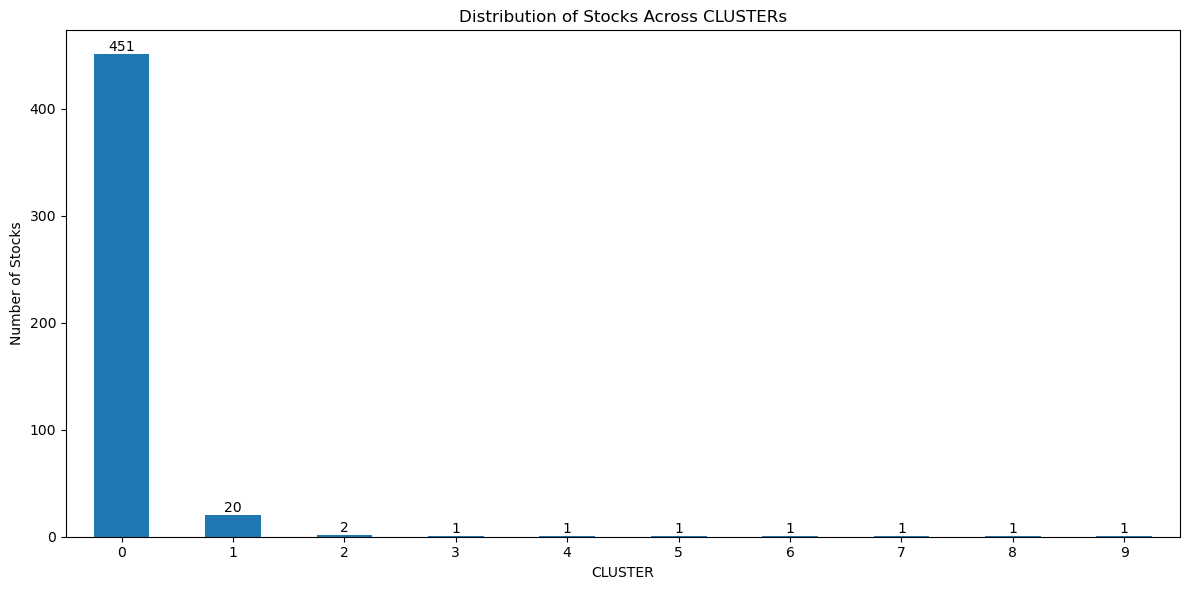

In [12]:
# Count unique stocks in each CLUSTER
cluster_stock_counts = df_experiement_best.groupby('CLUSTER')['symbol'].nunique().sort_index()

# Create detailed statistics DataFrame
cluster_stats = pd.DataFrame({
    'Stock_Count': cluster_stock_counts,
    'Total_Samples': df_experiement_best.groupby('CLUSTER').size(),
    'Avg_Samples_Per_Stock': df_experiement_best.groupby('CLUSTER').size() / cluster_stock_counts
})

print("Statistics for each CLUSTER:")
print("\nTotal number of stocks:", df_experiement_best['symbol'].nunique())
print("\nDetailed statistics:")
display(cluster_stats.round(2))

# Plot bar chart
plt.figure(figsize=(12, 6))
cluster_stock_counts.plot(kind='bar')
plt.title('Distribution of Stocks Across CLUSTERs')
plt.xlabel('CLUSTER')
plt.ylabel('Number of Stocks')
plt.xticks(rotation=0)

# Add value labels on bars
for i, v in enumerate(cluster_stock_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [44]:
C1 = df_experiement_best[df_experiement_best['CLUSTER']== 1]
C1['direction'] = (C1['RET'] >= 0).astype(int)
C1

/var/folders/bt/8q84pc_n54g9gbm004mb6xy80000gn/T/ipykernel_72053/1521272138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C1['direction'] = (C1['RET'] >= 0).astype(int)


,symbol,date,Sector,Industry,SIG_0,SIG_1,SIG_2,SIG_3,SIG_4,SIG_5,...,SIG_34,SIG_35,SIG_36,SIG_37,SIG_38,SIG_39,RET,CLUSTER,adaptive_weight,direction
1206,ABBV,2020-04-22,Healthcare,Drug Manufacturers - General,1.0,35.0,-0.027207,-0.007691,612.5,-1.659082,...,-0.002329,-1.083545e-05,1.168498e-07,0.000696,-1.234344e-06,-7.582557e-08,0.013813,1,0.000000e+00,1
1207,ABBV,2020-04-22,Healthcare,Drug Manufacturers - General,1.0,36.0,0.030692,-0.009161,648.0,0.396328,...,-0.002260,-6.843162e-06,1.552291e-08,0.000732,8.261368e-07,-1.281219e-07,0.013812,1,4.195139e-14,1
1208,ABBV,2020-04-23,Healthcare,Drug Manufacturers - General,1.0,35.0,0.041349,-0.009448,612.5,0.360304,...,-0.002518,-7.031108e-06,5.821491e-08,0.000794,8.799182e-07,-1.405741e-07,0.006997,1,0.000000e+00,1
1209,ABBV,2020-04-23,Healthcare,Drug Manufacturers - General,1.0,36.0,0.034603,-0.008975,648.0,0.120834,...,-0.002680,-5.944473e-06,-1.809686e-08,0.000836,5.936713e-07,-1.204717e-07,0.006997,1,2.221957e-24,1
1210,ABBV,2020-04-24,Healthcare,Drug Manufacturers - General,1.0,35.0,0.006550,-0.006724,612.5,0.100261,...,-0.001274,-5.394264e-06,-1.641597e-07,0.000409,3.644166e-07,-5.066889e-08,0.018893,1,0.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583227,WMT,2025-03-12,Consumer Defensive,Discount Stores,1.0,36.0,-0.038233,0.002253,648.0,-0.664310,...,0.000424,-7.909842e-07,-4.885416e-08,0.000039,4.374695e-08,1.906412e-09,-0.025618,1,2.827843e-31,0
583228,WMT,2025-03-13,Consumer Defensive,Discount Stores,1.0,35.0,-0.042583,0.002163,612.5,-0.623902,...,0.000496,-8.647849e-07,-3.908900e-08,0.000036,4.203637e-08,1.686239e-09,-0.008216,1,0.000000e+00,0
583229,WMT,2025-03-13,Consumer Defensive,Discount Stores,1.0,36.0,-0.024882,0.001940,648.0,0.004505,...,0.000535,-1.694204e-07,-4.786052e-08,0.000038,7.931180e-08,1.216036e-09,-0.008216,1,3.660648e-11,0
583230,WMT,2025-03-14,Consumer Defensive,Discount Stores,1.0,35.0,-0.012049,0.002293,612.5,0.022970,...,0.000298,-1.067640e-07,-8.042299e-08,0.000052,9.820211e-08,2.008961e-09,0.010059,1,0.000000e+00,1


In [45]:
C1[['symbol', 'Sector', 'Industry']].drop_duplicates().sort_values(by=['Sector', 'Industry']).reset_index(drop=True)

,symbol,Sector,Industry
0,T,Communication Services,Telecom Services
1,LOW,Consumer Cyclical,Home Improvement Retail
2,MCD,Consumer Cyclical,Restaurants
3,KO,Consumer Defensive,Beverages - Non-Alcoholic
4,PEP,Consumer Defensive,Beverages - Non-Alcoholic
5,COST,Consumer Defensive,Discount Stores
6,WMT,Consumer Defensive,Discount Stores
7,CVX,Energy,Oil & Gas Integrated
8,GS,Financial Services,Capital Markets
9,MA,Financial Services,Credit Services


/var/folders/bt/8q84pc_n54g9gbm004mb6xy80000gn/T/ipykernel_72053/1963724511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C1['date'] = pd.to_datetime(C1['date'])
/var/folders/bt/8q84pc_n54g9gbm004mb6xy80000gn/T/ipykernel_72053/1963724511.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C1['direction'] = (C1['RET'] >= 0).astype(int)


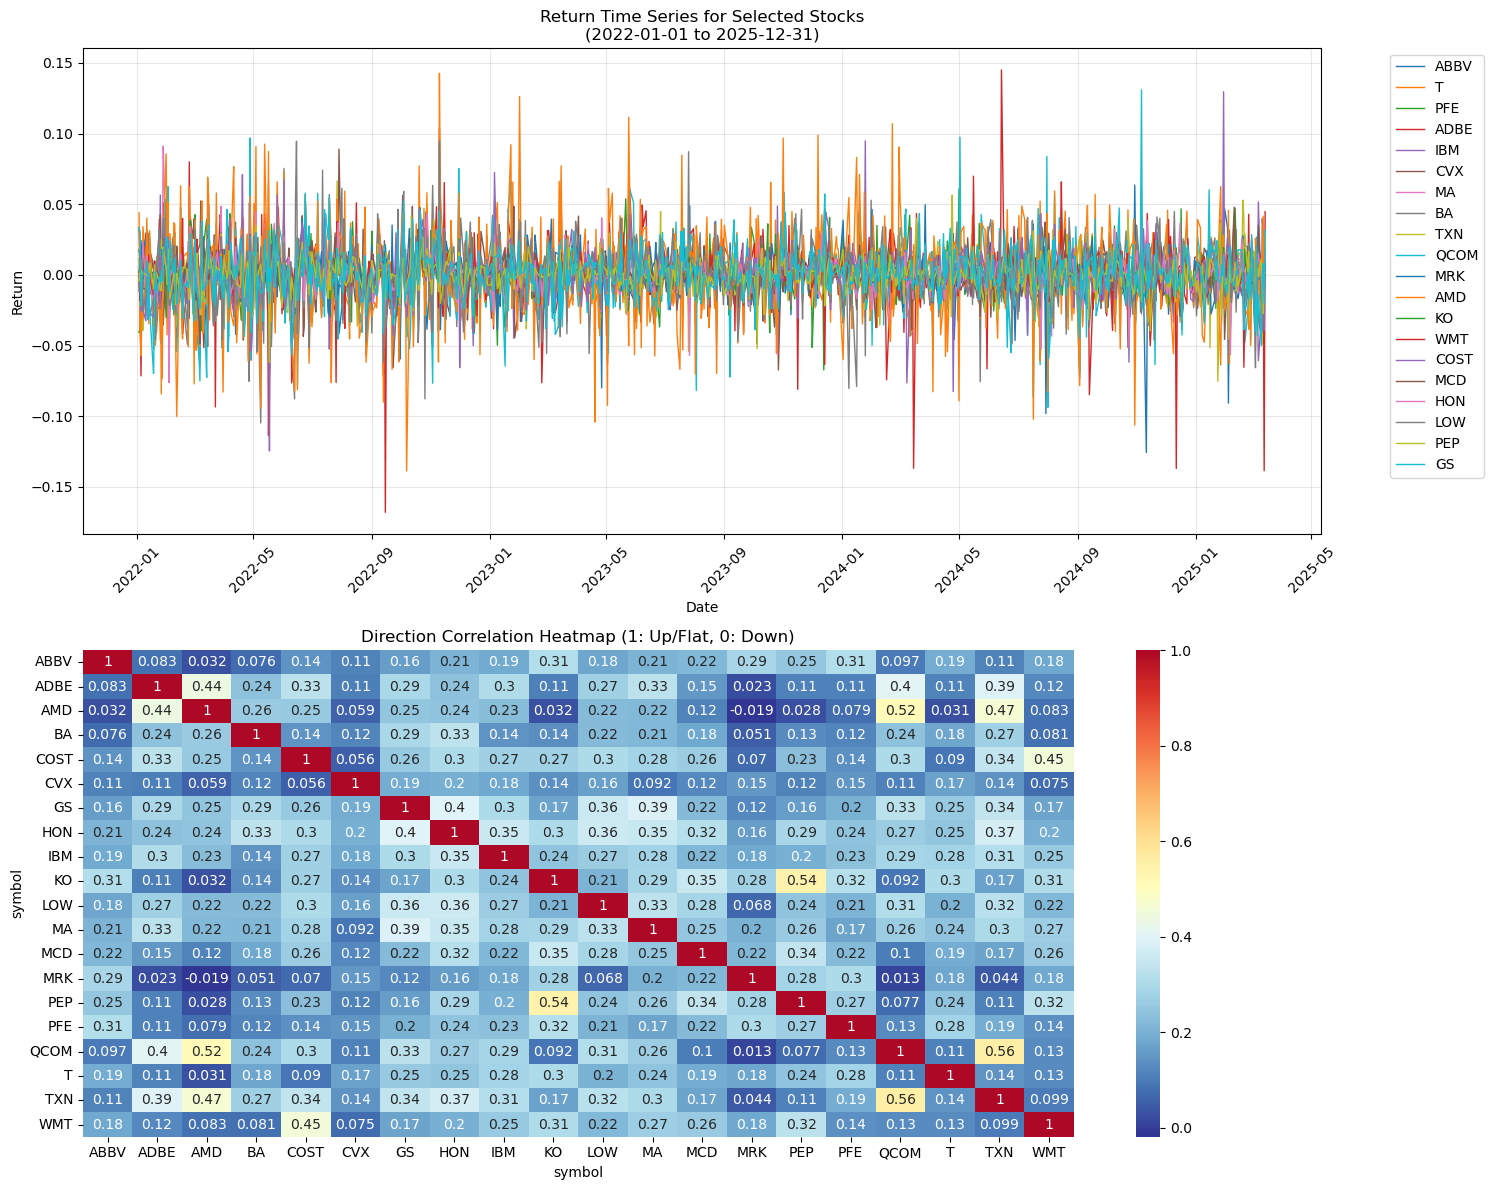


Return statistics and direction correlation:

ABBV:
Return statistics:
count    1604.0000
mean        0.0008
std         0.0139
min        -0.1257
25%        -0.0061
50%         0.0010
75%         0.0086
max         0.0636
Name: RET, dtype: float64
Up/Flat days: 54.36%
Down days: 45.64%

T:
Return statistics:
count    1604.0000
mean        0.0008
std         0.0159
min        -0.1041
25%        -0.0072
50%         0.0009
75%         0.0089
max         0.0848
Name: RET, dtype: float64
Up/Flat days: 53.62%
Down days: 46.38%

PFE:
Return statistics:
count    1604.0000
mean       -0.0007
std         0.0153
min        -0.0672
25%        -0.0107
50%        -0.0010
75%         0.0081
max         0.0609
Name: RET, dtype: float64
Up/Flat days: 46.88%
Down days: 53.12%

ADBE:
Return statistics:
count    1604.0000
mean       -0.0002
std         0.0241
min        -0.1679
25%        -0.0111
50%        -0.0002
75%         0.0127
max         0.1451
Name: RET, dtype: float64
Up/Flat days: 49.63%
Down

In [51]:
from scipy.stats import chi2_contingency
# Set random seed for reproducibility
np.random.seed(42)

# Convert date to datetime if not already
C1['date'] = pd.to_datetime(C1['date'])

# Add direction column
C1['direction'] = (C1['RET'] >= 0).astype(int)

# Randomly select 5 stocks
selected_stocks = np.random.choice(C1['symbol'].unique(), size=20, replace=False)

# Set time range (you can modify these dates)
start_date = '2022-01-01'
end_date = '2025-12-31'

# Filter data for selected stocks and time range
plot_data = C1[
    (C1['symbol'].isin(selected_stocks)) & 
    (C1['date'] >= start_date) & 
    (C1['date'] <= end_date)
]

# Create two subplots: one for returns, one for heatmap
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot returns
for symbol in selected_stocks:
    stock_data = plot_data[plot_data['symbol'] == symbol]
    ax1.plot(stock_data['date'], stock_data['RET'], label=symbol, linewidth=1)

ax1.set_title(f'Return Time Series for Selected Stocks\n({start_date} to {end_date})')
ax1.set_xlabel('Date')
ax1.set_ylabel('Return')
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# Create direction matrix for correlation
direction_matrix = pd.pivot_table(
    plot_data, 
    values='direction', 
    index='date', 
    columns='symbol'
)

# Calculate correlation
corr_matrix = direction_matrix.corr()

# Plot heatmap
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='RdYlBu_r',
            center=0.5,
            ax=ax2)
ax2.set_title('Direction Correlation Heatmap (1: Up/Flat, 0: Down)')

plt.tight_layout()
plt.show()

# Print statistics
print("\nReturn statistics and direction correlation:")
for symbol in selected_stocks:
    stock_data = plot_data[plot_data['symbol'] == symbol]
    print(f"\n{symbol}:")
    print("Return statistics:")
    print(stock_data['RET'].describe().round(4))
    print(f"Up/Flat days: {(stock_data['direction'] == 1).mean()*100:.2f}%")
    print(f"Down days: {(stock_data['direction'] == 0).mean()*100:.2f}%")

# Calculate and print the percentage of days both stocks move in the same direction
same_direction = (direction_matrix[selected_stocks[0]] == direction_matrix[selected_stocks[1]]).mean() * 100
print(f"\nPercentage of days stocks move in the same direction: {same_direction:.2f}%")

# Chi-square test for independence
contingency_table = pd.crosstab(
    direction_matrix[selected_stocks[0]], 
    direction_matrix[selected_stocks[1]]
)
chi2, p_value = chi2_contingency(contingency_table)[:2]
print(f"\nChi-square test of independence:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")

In [35]:
C1

,symbol,date,Sector,Industry,SIG_0,SIG_1,SIG_2,SIG_3,SIG_4,SIG_5,...,SIG_33,SIG_34,SIG_35,SIG_36,SIG_37,SIG_38,SIG_39,RET,CLUSTER,adaptive_weight
1206,ABBV,2020-04-22,Healthcare,Drug Manufacturers - General,1.0,35.0,-0.027207,-0.007691,612.5,-1.659082,...,1.634576e-04,-0.002329,-1.083545e-05,1.168498e-07,0.000696,-1.234344e-06,-7.582557e-08,0.013813,1,0.000000e+00
1207,ABBV,2020-04-22,Healthcare,Drug Manufacturers - General,1.0,36.0,0.030692,-0.009161,648.0,0.396328,...,4.666502e-04,-0.002260,-6.843162e-06,1.552291e-08,0.000732,8.261368e-07,-1.281219e-07,0.013812,1,4.195139e-14
1208,ABBV,2020-04-23,Healthcare,Drug Manufacturers - General,1.0,35.0,0.041349,-0.009448,612.5,0.360304,...,4.995849e-04,-0.002518,-7.031108e-06,5.821491e-08,0.000794,8.799182e-07,-1.405741e-07,0.006997,1,0.000000e+00
1209,ABBV,2020-04-23,Healthcare,Drug Manufacturers - General,1.0,36.0,0.034603,-0.008975,648.0,0.120834,...,3.927519e-04,-0.002680,-5.944473e-06,-1.809686e-08,0.000836,5.936713e-07,-1.204717e-07,0.006997,1,2.221957e-24
1210,ABBV,2020-04-24,Healthcare,Drug Manufacturers - General,1.0,35.0,0.006550,-0.006724,612.5,0.100261,...,1.927046e-04,-0.001274,-5.394264e-06,-1.641597e-07,0.000409,3.644166e-07,-5.066889e-08,0.018893,1,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583227,WMT,2025-03-12,Consumer Defensive,Discount Stores,1.0,36.0,-0.038233,0.002253,648.0,-0.664310,...,-1.529313e-06,0.000424,-7.909842e-07,-4.885416e-08,0.000039,4.374695e-08,1.906412e-09,-0.025618,1,2.827843e-31
583228,WMT,2025-03-13,Consumer Defensive,Discount Stores,1.0,35.0,-0.042583,0.002163,612.5,-0.623902,...,-5.699860e-06,0.000496,-8.647849e-07,-3.908900e-08,0.000036,4.203637e-08,1.686239e-09,-0.008216,1,0.000000e+00
583229,WMT,2025-03-13,Consumer Defensive,Discount Stores,1.0,36.0,-0.024882,0.001940,648.0,0.004505,...,-1.276928e-05,0.000535,-1.694204e-07,-4.786052e-08,0.000038,7.931180e-08,1.216036e-09,-0.008216,1,3.660648e-11
583230,WMT,2025-03-14,Consumer Defensive,Discount Stores,1.0,35.0,-0.012049,0.002293,612.5,0.022970,...,-5.236330e-09,0.000298,-1.067640e-07,-8.042299e-08,0.000052,9.820211e-08,2.008961e-09,0.010059,1,0.000000e+00


Sector Distribution in CLUSTER 1:
---------------------------------
                        Stocks_in_C1  Total_Stocks  Percentage
Sector                                                        
Consumer Defensive                 4            35       11.43
Technology                         5            78        6.41
Healthcare                         3            61        4.92
Communication Services             1            21        4.76
Energy                             1            21        4.76
Consumer Cyclical                  2            53        3.77
Financial Services                 2            62        3.23
Industrials                        2            68        2.94

Industry Distribution in CLUSTER 1:
---------------------------------
                                 Stocks_in_C1  Total_Stocks  Percentage
Industry                                                               
Beverages - Non-Alcoholic                   2             4       50.00
Conglomerates  

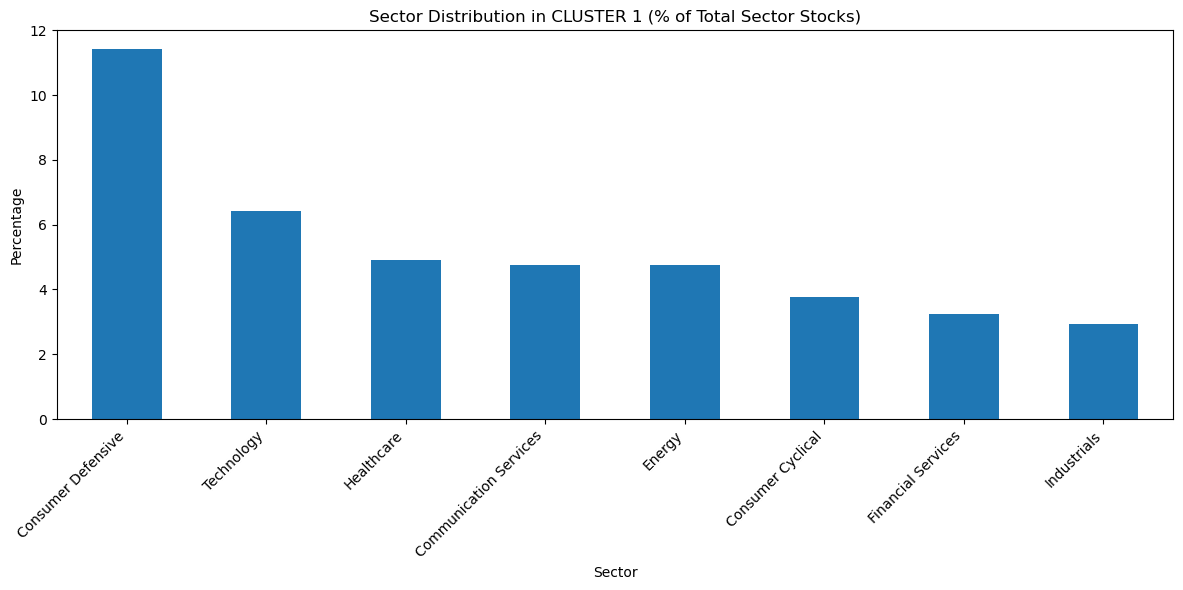

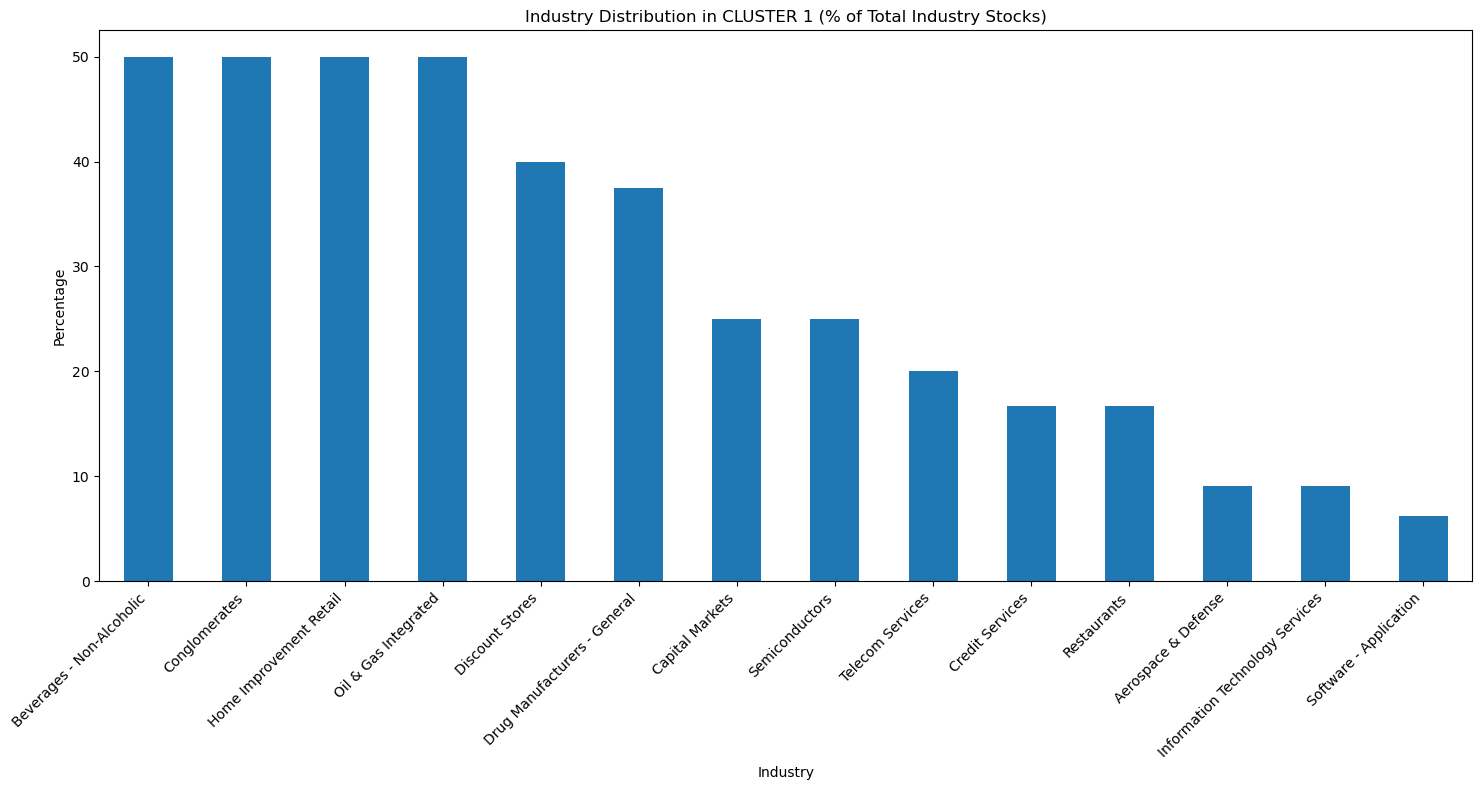


Summary Statistics:
Total unique stocks in CLUSTER 1: 20
Number of sectors represented: 8
Number of industries represented: 14


In [39]:
# Get all stocks in CLUSTER 1
C1 = df_experiement_best[df_experiement_best['CLUSTER']== 1].copy()

# Get unique stocks and their sectors/industries in CLUSTER 1
C1_stocks = C1[['symbol', 'Sector', 'Industry']].drop_duplicates()

# Get counts for CLUSTER 1
C1_sector_counts = C1_stocks['Sector'].value_counts()
C1_industry_counts = C1_stocks['Industry'].value_counts()

# Get total counts only for sectors and industries present in CLUSTER 1
relevant_sectors = C1_sector_counts.index
relevant_industries = C1_industry_counts.index

total_by_sector = df_experiement_best[
    df_experiement_best['Sector'].isin(relevant_sectors)
][['symbol', 'Sector']].drop_duplicates()['Sector'].value_counts()

total_by_industry = df_experiement_best[
    df_experiement_best['Industry'].isin(relevant_industries)
][['symbol', 'Industry']].drop_duplicates()['Industry'].value_counts()

# Create summary DataFrames
sector_summary = pd.DataFrame({
    'Stocks_in_C1': C1_sector_counts,
    'Total_Stocks': total_by_sector,
})
sector_summary['Percentage'] = (sector_summary['Stocks_in_C1'] / sector_summary['Total_Stocks'] * 100).round(2)

industry_summary = pd.DataFrame({
    'Stocks_in_C1': C1_industry_counts,
    'Total_Stocks': total_by_industry
})
industry_summary['Percentage'] = (industry_summary['Stocks_in_C1'] / industry_summary['Total_Stocks'] * 100).round(2)

# Sort by percentage
sector_summary = sector_summary.sort_values('Percentage', ascending=False)
industry_summary = industry_summary.sort_values('Percentage', ascending=False)

# Print results
print("Sector Distribution in CLUSTER 1:")
print("---------------------------------")
print(sector_summary)
print("\nIndustry Distribution in CLUSTER 1:")
print("---------------------------------")
print(industry_summary)

# Visualize sector distribution
plt.figure(figsize=(12, 6))
sector_summary['Percentage'].plot(kind='bar')
plt.title('Sector Distribution in CLUSTER 1 (% of Total Sector Stocks)')
plt.xlabel('Sector')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize industry distribution
plt.figure(figsize=(15, 8))
industry_summary['Percentage'].plot(kind='bar')
plt.title('Industry Distribution in CLUSTER 1 (% of Total Industry Stocks)')
plt.xlabel('Industry')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nSummary Statistics:")
print(f"Total unique stocks in CLUSTER 1: {len(C1_stocks)}")
print(f"Number of sectors represented: {len(C1_sector_counts)}")
print(f"Number of industries represented: {len(C1_industry_counts)}")

general regression: regression based on each stock's own previous days data.
451 stocks similar analysis as above
kernel 10 -> 2/3/4
